### Classifying Devanagri script charecters
Data from https://archive.ics.uci.edu/ml/datasets/Devanagari+Handwritten+Character+Dataset

This problem was attempted in Day 2 notes of fastai v3 - https://github.com/hiromis/notes/blob/master/pdf/Lesson2.pdf

In [25]:
import fastai
from fastai.vision.data import ImageList
from fastai.vision import get_transforms,ClassificationInterpretation
from fastai.vision.learner import cnn_learner
from fastai.vision import models
from fastai.metrics import error_rate

In [2]:
!pip freeze | grep fastai

fastai==1.0.55


In [3]:
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/00389/DevanagariHandwrittenCharacterDataset.zip
# !unzip DevanagariHandwrittenCharacterDataset.zip
!ls DevanagariHandwrittenCharacterDataset/

Test  Train


In [4]:
!ls DevanagariHandwrittenCharacterDataset/Train

character_10_yna       character_25_ma		  character_6_cha
character_11_taamatar  character_26_yaw		  character_7_chha
character_12_thaa      character_27_ra		  character_8_ja
character_13_daa       character_28_la		  character_9_jha
character_14_dhaa      character_29_waw		  digit_0
character_15_adna      character_2_kha		  digit_1
character_16_tabala    character_30_motosaw	  digit_2
character_17_tha       character_31_petchiryakha  digit_3
character_18_da        character_32_patalosaw	  digit_4
character_19_dha       character_33_ha		  digit_5
character_1_ka	       character_34_chhya	  digit_6
character_20_na        character_35_tra		  digit_7
character_21_pa        character_36_gya		  digit_8
character_22_pha       character_3_ga		  digit_9
character_23_ba        character_4_gha
character_24_bha       character_5_kna


We will use the datablock api so that we can understand the output of each step

https://docs.fast.ai/data_block.html

In [5]:
imglist = ImageList.from_folder('DevanagariHandwrittenCharacterDataset/')
imglist

ImageList (92000 items)
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
Path: DevanagariHandwrittenCharacterDataset

In [10]:
imglists = imglist.split_by_folder(train='Train',valid='Test')
imglists

ItemLists;

Train: ImageList (78200 items)
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
Path: DevanagariHandwrittenCharacterDataset;

Valid: ImageList (13800 items)
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
Path: DevanagariHandwrittenCharacterDataset;

Test: None

In [11]:
lbl_lists = imglists.label_from_folder()
lbl_lists

LabelLists;

Train: LabelList (78200 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
character_10_yna,character_10_yna,character_10_yna,character_10_yna,character_10_yna
Path: DevanagariHandwrittenCharacterDataset;

Valid: LabelList (13800 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
character_10_yna,character_10_yna,character_10_yna,character_10_yna,character_10_yna
Path: DevanagariHandwrittenCharacterDataset;

Test: None

### Lets look at the classes identified

In [12]:
lbl_lists.classes[:3]

['character_10_yna', 'character_11_taamatar', 'character_12_thaa']

#### Add transformations

In [13]:
tfms = get_transforms(do_flip=False)
transformed = lbl_lists.transform(tfms,size=32)
transformed

LabelLists;

Train: LabelList (78200 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
character_10_yna,character_10_yna,character_10_yna,character_10_yna,character_10_yna
Path: DevanagariHandwrittenCharacterDataset;

Valid: LabelList (13800 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
character_10_yna,character_10_yna,character_10_yna,character_10_yna,character_10_yna
Path: DevanagariHandwrittenCharacterDataset;

Test: None

In [14]:
db = transformed.databunch()
db

ImageDataBunch;

Train: LabelList (78200 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
character_10_yna,character_10_yna,character_10_yna,character_10_yna,character_10_yna
Path: DevanagariHandwrittenCharacterDataset;

Valid: LabelList (13800 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
character_10_yna,character_10_yna,character_10_yna,character_10_yna,character_10_yna
Path: DevanagariHandwrittenCharacterDataset;

Test: None

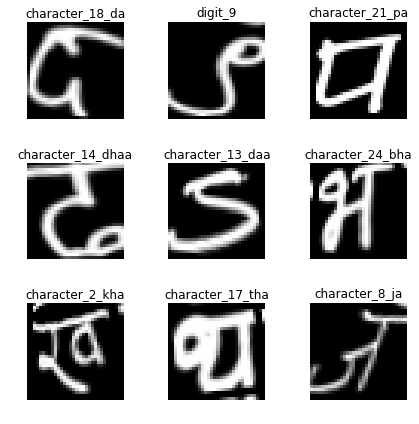

In [15]:
db.show_batch(3,figsize=(6,6))

In [24]:
learner = cnn_learner(db,base_arch=models.resnet34,metrics=error_rate)
learner.fit_one_cycle(8,slice(1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,2.665974,2.201410,0.561594,00:44
1,1.715516,1.274949,0.361812,00:47
2,1.228335,0.771064,0.221812,00:44
3,0.927025,0.544660,0.162826,00:45
4,0.750266,0.418311,0.122609,00:45
5,0.683498,0.372077,0.109565,00:45
6,0.634737,0.348821,0.102899,00:45
7,0.630596,0.337842,0.102029,00:46


### interpretation

In [27]:
interp = ClassificationInterpretation.from_learner(learner)
interp

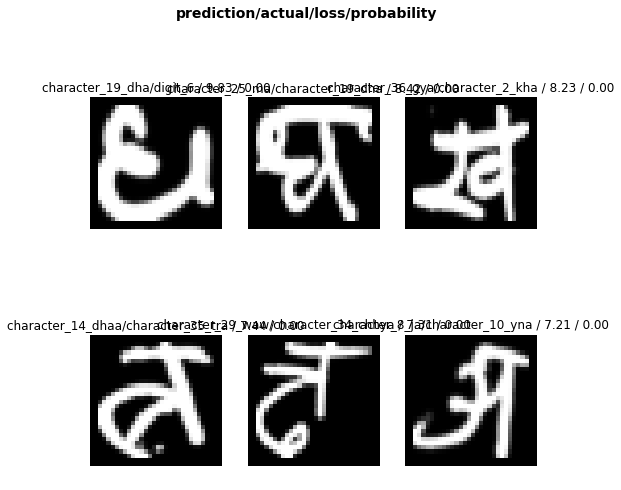

In [31]:
interp.plot_top_losses(6,figsize=(8,8))

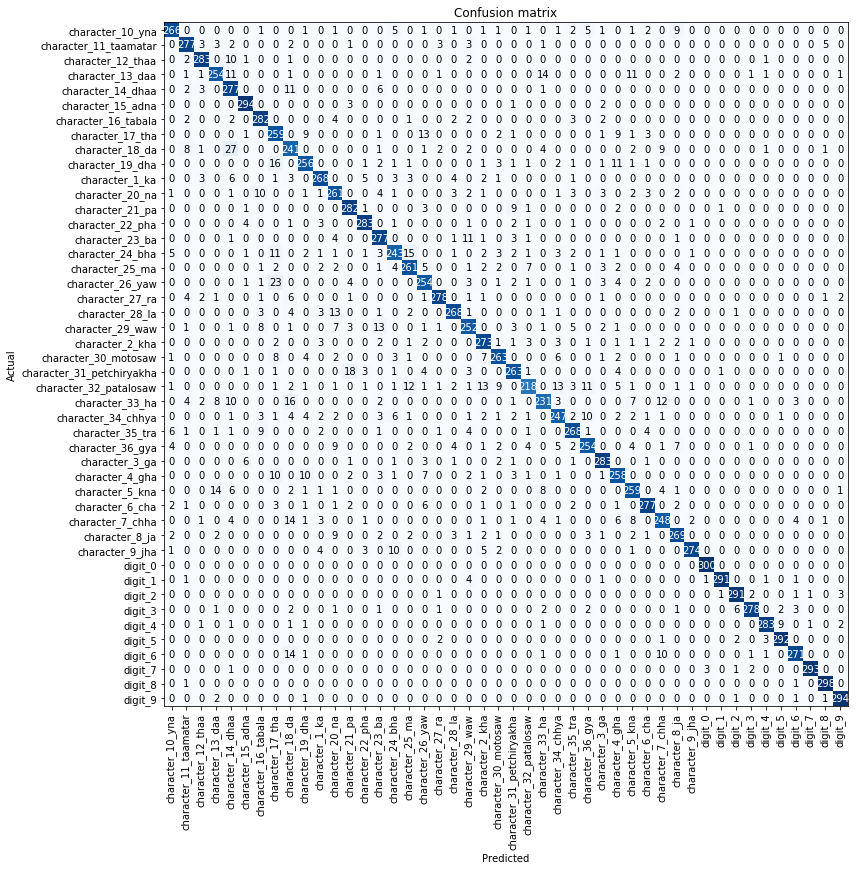

In [33]:
interp.plot_confusion_matrix(figsize=(12,12))

### Train all layers

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


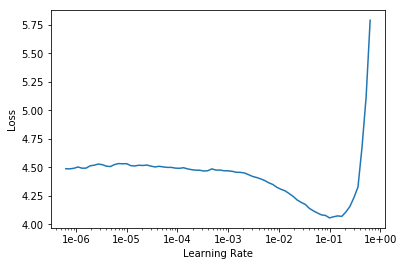

In [22]:
learner.lr_find()
learner.recorder.plot()

In [36]:
learner.unfreeze()
learner.fit_one_cycle(4,slice(1e-6,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.451572,0.211861,0.063696,00:56
1,0.254336,0.108282,0.031449,00:59
2,0.128748,0.059624,0.017754,00:56
3,0.084941,0.045900,0.013986,00:58


In [37]:
learner.fit_one_cycle(2,slice(1e-6,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.167708,0.065666,0.020290,01:00
1,0.072746,0.040884,0.011667,00:57


### so that is an accuracy of almost 98.9%. 